# The Causes of Difference in SAT-performance across NYC Schools

# Project introduction

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

## Methodology

This analysis will use descriptive statistics (e.g. mean, correlations) and data visualizations (e.g. scatter plots, bar charts, maps) to explore the following datasets on NYC high schools:

   - [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
   - [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
   - [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
   - [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
   - [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
   - [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
   - [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

The ETL portion of this analysis was executed based on dataquest instructions.

## Results

 These are the main findings based on the research:

   - Student racial composition is correlated with SAT scores: the schools with a bigger share of black and hispanic students tend to have lower SAT results than schools with predominantly white and asian students. Interestingly, the schools with more balanced racial composition tend to show better SAT results.
   - Students to whom English is not their native language tend to show lower SAT results. 
   - Schools which students find their environment to be safer and more respectful on general show higher SAT results and vice versa. 
   - Schools with high share of students who come from low-income families (indirectly estimated by their eligibility for Free-or-Reduced Price lunch program) are doing worse in SATs. 
   - High academic expectations set by students have got a positive effect on their SAT performance. 

# Read in the Data

In [1]:
#import the libraries used in the the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


# jupyter command to show plots in notebook
%matplotlib inline

# setting pandas display options
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.max_columns", 20)
#pd.set_option("display.max_rows", 20)
pd.set_option('max_colwidth', 50)

#read separate .csv files into a single dictionary
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for file in data_files:
    file_name = file[:-4]
    data[file_name] = pd.read_csv(file)
    
for key in data.keys():
    print(key)

ap_2010
class_size
demographics
graduation
hs_directory
sat_results


In [2]:
#initial exploration
for key in data.keys():
    print(key)
    print(data[key].head())
    print('\n')

ap_2010
      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.           39.000   
1  01M450                 EAST SIDE COMMUNITY HS           19.000   
2  01M515                    LOWER EASTSIDE PREP           24.000   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH          255.000   
4  02M296  High School of Hospitality Management              nan   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0             49.000                                10.000  
1             21.000                                   nan  
2             26.000                                24.000  
3            377.000                               191.000  
4                nan                                   nan  


class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto

In [3]:
#read in the Surveys .txt files
all_survey = pd.read_csv('survey_all.txt', delimiter='\t', 
                         encoding='windows-1252') 
d75_survey = pd.read_csv('survey_d75.txt', delimiter='\t', 
                         encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.000,Elementary School,nan,88,60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.000,Elementary School,nan,100,60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.000,Elementary School,nan,88,73,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.000,Elementary / Middle School,89.000,73,50,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,01M063,M063,P.S. 063 William McKinley,0,No,0.000,Elementary School,nan,100,60,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [4]:
survey['DBN'] = survey['dbn']

#filtering the important for the analysis columns only
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
                 "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11",
                 "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11",
                 "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey[survey_fields]

#adding as a key to the dictionary with the rest of the data
data['survey'] = survey

# Adding and Converting Features

In [5]:
# add DBN columns as unique identifier in datasets where they are not yet present
data['hs_directory']['DBN']=data['hs_directory']['dbn']

def padded_csd(val):
    val=str(val)
    return val if len(val)>=2 else val.zfill(2)  
        
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(padded_csd)
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.000,1.000,19.000,19.000,19.000,ATS,nan,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.000,1.000,21.000,21.000,21.000,ATS,nan,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.000,1.000,17.000,17.000,17.000,ATS,nan,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.000,1.000,17.000,17.000,17.000,ATS,nan,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.000,1.000,15.000,15.000,15.000,ATS,nan,01,01M015


In [6]:
#summing SAT-score
sat_field = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for field in sat_field:
    data['sat_results'][field] = pd.to_numeric(data['sat_results'][field], errors='coerce') 

data['sat_results']['sat_score'] = data['sat_results'][sat_field[0]]+data['sat_results'][sat_field[1]]+data['sat_results'][sat_field[2]]

data['sat_results']['sat_score'].head()

0   1,122.000
1   1,172.000
2   1,149.000
3   1,174.000
4   1,207.000
Name: sat_score, dtype: float64

In [7]:
#extracting latitude and longtitude to separate columns 
coordinates = data['hs_directory']['Location 1'].str.extract(r'\((.+)\)', expand=False)
latitude = coordinates.str.split(',').str[0]
longtitude = coordinates.str.split(',').str[1]

data['hs_directory']['lat'] = latitude
data['hs_directory']['lon'] = longtitude
data['hs_directory'].head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.000,12,nan,nan,...,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.000,47.000,308.000,"3,194,998.000","3,071,850,020.000",Gravesend ...,21K540,40.589238098,-73.981746524
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.000,12,nan,nan,...,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.000,33.000,69.000,"3,006,401.000","3,004,020,001.000",DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,15K429,40.685451806,-73.993491465
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.000,12,nan,nan,...,"45 35 Van Dam Street\nLong Island City, NY 111...",2.000,26.000,179.000,"4,003,442.000","4,002,490,001.000",Hunters Point-Sunnyside-West Maspeth ...,24Q530,40.744149536,-73.933626741
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.000,12,nan,nan,...,"509 West 129 Street\nNew York, NY 10027\n(40.8...",9.000,7.000,219.000,"1,059,723.000","1,019,840,033.000",Manhattanville ...,05M367,40.815230365,-73.955201206
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.000,12,nan,nan,...,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.000,31.000,"100,802.000","4,300,730.000","4,157,360,001.000",Far Rockaway-Bayswater ...,27Q260,40.601989336,-73.762834323


In [8]:
#convert the coordinates columns to numeric
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
print(data['hs_directory'][['lon', 'lat']].dtypes)

lon    float64
lat    float64
dtype: object


In [9]:
#convert AP scores columns to numeric
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors = 'coerce')
        
print(data['ap_2010'][cols].dtypes)

AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


# Condense and Combine Datasets

In [10]:
# selecting the classes relevant for SAT-analysis (high school, general education)
class_size = data['class_size']
class_size = class_size[(class_size['GRADE '] == '09-12') & (class_size['PROGRAM TYPE'] == 'GEN ED')]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.000,3.000,21.000,19.000,25.000,STARS,nan,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.000,3.000,26.300,24.000,31.000,STARS,nan,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.000,2.000,19.000,16.000,22.000,STARS,nan,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.000,3.000,23.000,13.000,30.000,STARS,nan,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.000,3.000,17.700,16.000,21.000,STARS,nan,01,01M292


In [11]:
# compute average class size by school across all subjects
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.000,4.000,22.564,18.500,26.571,nan
1,01M332,1,46.000,2.000,22.000,21.000,23.500,nan
2,01M378,1,33.000,1.000,33.000,33.000,33.000,nan
3,01M448,1,105.688,4.750,22.231,18.250,27.062,nan
4,01M450,1,57.600,2.733,21.200,19.400,22.867,nan


In [12]:
# select most recent data available in "demographics" dataset
demographics = data['demographics']
demographics = demographics[demographics['schoolyear'] == 20112012]
data['demographics'] = demographics
data['demographics'].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.400,189,13,31,35,28,...,63,33.300,109,57.700,4,2.100,97.000,51.300,92.000,48.700
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.500,328,32,46,52,54,...,81,24.700,158,48.200,28,8.500,147.000,44.800,181.000,55.200
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.500,626,52,102,121,87,...,55,8.800,357,57.000,16,2.600,330.000,52.700,296.000,47.300
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.700,401,14,34,38,36,...,90,22.400,275,68.600,8,2.000,204.000,50.900,197.000,49.100
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.900,176,18,20,30,21,...,41,23.300,110,62.500,15,8.500,97.000,55.100,79.000,44.900


In [13]:
# select most recent data available in "graduation" dataset
graduation = data['graduation']
graduation = graduation[(graduation['Cohort'] == '2006') & (graduation['Demographic'] == 'Total Cohort')]
data['graduation'] = graduation
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.100,36,46.200,83.700,...,36,46.200,83.700,7,9.000,16.300,16,20.500,11,14.100
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.700,42,33.900,79.200,...,34,27.400,64.200,11,8.900,20.800,46,37.100,20,16.100
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.800,67,74.400,95.700,...,67,74.400,95.700,3,3.300,4.300,15,16.700,5,5.600
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.000,40,47.600,85.100,...,23,27.400,48.900,7,8.300,14.900,25,29.800,5,6.000
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.400,91,47.200,86.700,...,22,11.400,21.000,14,7.300,13.300,53,27.500,35,18.100


In [14]:
#check first three dataset sizes in order to decide on the best merging strategy
data['sat_results'].info()
data['ap_2010'].info()
data['graduation'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
 6   sat_score                        421 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DBN                                   258 

In [15]:
#initiate the combined dataset with our main variable we want to investigate
combined = data["sat_results"]

#left joins for somewhat sparse datasets, because we do not want to loose any SAT-info
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.000,404.000,363.000,"1,122.000",NaN,nan,nan,...,36,46.200,83.700,7,9.000,16.300,16,20.500,11,14.100
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.000,423.000,366.000,"1,172.000",UNIVERSITY NEIGHBORHOOD H.S.,39.000,49.000,...,34,27.400,64.200,11,8.900,20.800,46,37.100,20,16.100
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.000,402.000,370.000,"1,149.000",EAST SIDE COMMUNITY HS,19.000,21.000,...,67,74.400,95.700,3,3.300,4.300,15,16.700,5,5.600
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.000,401.000,359.000,"1,174.000",NaN,nan,nan,...,NaN,nan,nan,NaN,nan,nan,NaN,nan,NaN,nan
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.000,433.000,384.000,"1,207.000",NaN,nan,nan,...,23,27.400,48.900,7,8.300,14.900,25,29.800,5,6.000


In [16]:
# check the size of the rest of datasets before continuing with merging
rest_to_merge = ['class_size', 'demographics', 'survey', 'hs_directory']
for df in rest_to_merge:
    print(data[df]['DBN'].shape)

(583,)
(1509,)
(1702,)
(435,)


In [17]:
# inner joins for other dataset that potentially contain very relevant explanatory features
# if these features are not available for a high school, we want to exclude these schools
for df in rest_to_merge:
    combined = combined.merge(data[df], on = 'DBN', how = 'inner')
    
print(combined.head())

print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                          355.000   
1                     91                          383.000   
2                     70                          377.000   
3                     44                          390.000   
4                    159                          522.000   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0              404.000                 363.000  1,122.000   
1              423.000                 366.000  1,172.000   
2              402.000                 370.000  1,149.000   
3   

In [18]:
#missing values for numeric columns filled with mean, non-numerics with zeros 
means = combined.mean()
missing_vals = combined.isnull().sum()
combined.fillna(means, inplace=True)
combined.fillna(0, inplace=True)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.000,404.000,363.000,"1,122.000",0,129.029,197.038,...,0.000,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.000,1.000,201.000,"1,003,223.000","1,002,690,041.000",Lower East Side ...,40.714,-73.985
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.000,423.000,366.000,"1,172.000",UNIVERSITY NEIGHBORHOOD H.S.,39.000,49.000,...,0.000,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.000,1.000,202.000,"1,003,214.000","1,002,590,044.000",Lower East Side ...,40.712,-73.985
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.000,402.000,370.000,"1,149.000",EAST SIDE COMMUNITY HS,19.000,21.000,...,0.000,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.000,2.000,34.000,"1,005,974.000","1,004,390,017.000",East Village ...,40.730,-73.983
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.000,433.000,384.000,"1,207.000",0,129.029,197.038,...,0.000,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.000,1.000,"3,001.000","1,004,323.000","1,003,540,080.000",Chinatown ...,40.721,-73.986
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.000,574.000,525.000,"1,621.000","NEW EXPLORATIONS SCI,TECH,MATH",255.000,377.000,...,0.000,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.000,2.000,"2,201.000","1,004,070.000","1,003,350,001.000",Lower East Side ...,40.719,-73.979


In [19]:
#add a school district column for later analysis
combined['school_dist'] = combined['DBN'].apply(lambda x: x[:2])
combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

# Observation of the Correlations

The first thing to do is to find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. 

We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated. In general, r values above .25 or below -.25 are enough to qualify a correlation as interesting. An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possibility of one. To really assess whether or not a correlation exists, we need to look at the data using a scatter plot to see its "shape".

In [20]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation
survey_fields.remove('DBN')

In [21]:
# calculate overall correlations with SAT-scores
correlations = combined.corr()
correlations = correlations["sat_score"]

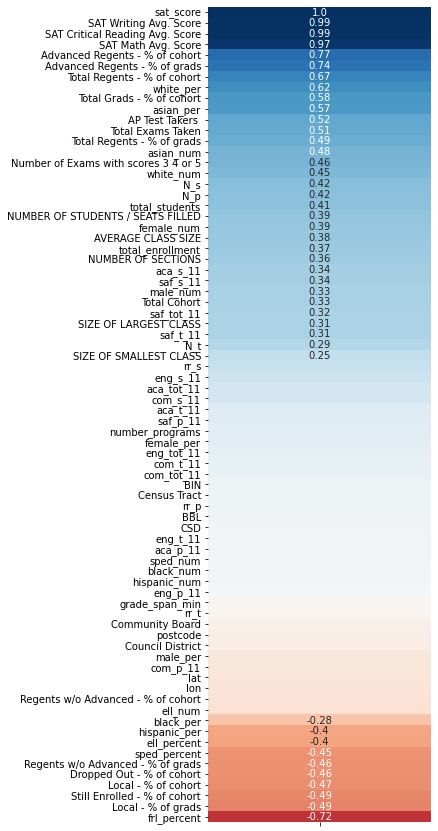

In [22]:
def correlation_heatmap(dataframe):
    correlations = dataframe.corr().loc[:,['sat_score']].sort_values(by='sat_score', ascending=False)
    #dropping the null-values
    correlations = correlations[~correlations['sat_score'].isnull()]
    plt.figure(figsize=(4,15))
    ax=sns.heatmap(correlations, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True, cbar=False)
    #round the values and hide labels for values between -0.25 and 0.25
    for text in ax.texts:
        t=float(text.get_text())
        if -0.25 < t < 0.25:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
    ax.tick_params(labelbottom=False)

correlation_heatmap(combined)

Unsurprisingly, `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, `SAT Writing Avg. Score` are strongly correlated with `sat_score`.

We can also make some other observations:

   - `total_enrollment` has a strong positive correlation with `sat_score`. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores. However, it looks like the opposite is true -- larger schools tend to do better on the SAT.
        - Other columns that are proxies for enrollment correlate similarly. These include `total_students`, `N_s`, `N_p`, `N_t`, `AP Test Takers`, `Total Exams Taken`, and `NUMBER OF SECTIONS`.
   - Both the number of females (`female_num`) and number of males (`male_num`) at a school correlate positively with SAT score (which can be because these features are related to the total number of students). While the percentage of females (`female_per`) correlates positively and the percentage of males (`male_per`) correlates negatively, their respective r values indicate that a possible correlation is quite weak. 
   - Teacher and student ratings of school safety (`saf_t_11`, and `saf_s_11`) correlate with sat_score.
   - Student ratings of school academic standards (`aca_s_11`) correlate with sat_score, but this does not hold for ratings from teachers and parents (`aca_p_11` and `aca_t_11`).
   - There is significant racial inequality in SAT scores (`white_per`, `asian_per`, `black_per`, `hispanic_per`).
   - The percentage of English language learners at the school (`ell_percent`)and students eligible for the free-and-reduced-price lunch program (`frl_percent`) has a strong negative correlation with SAT scores.


## Total enrollment and SAT-results

Because enrollment seems to have such a strong correlation, let's make a scatter plot of `total_enrollment` vs `sat_score`.

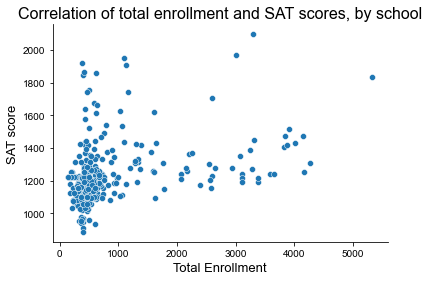

In [23]:
#plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('white')
ax = sns.scatterplot(data=combined, x='total_enrollment', y='sat_score')

#plot aesthetics
ax.set_title('Correlation of total enrollment and SAT scores, by school', fontsize=16)
ax.set_xlabel('Total Enrollment', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

It doesn't appear that there's an extremely strong correlation. However, there's an interesting cluster of points at the bottom left where `total_enrollment` and `sat_score` are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [24]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
low_enrollment.T

,91,125,126,139,141,176,179,188,225,237,253,286
DBN,07X334,09X365,09X403,10X268,10X342,12X388,12X550,13K439,17K524,18K563,19K583,24Q296
SCHOOL NAME,INTERNATIONAL COMMUNITY HIGH SCHOOL,ACADEMY FOR LANGUAGE AND TECHNOLOGY,BRONX INTERNATIONAL HIGH SCHOOL,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,HIGH SCHOOL OF WORLD CULTURES,BROOKLYN INTERNATIONAL HIGH SCHOOL,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,IT TAKES A VILLAGE ACADEMY,MULTICULTURAL HIGH SCHOOL,PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Num of SAT Test Takers,34,54,49,52,49,30,42,90,71,56,29,55
SAT Critical Reading Avg. Score,310.000,315.000,314.000,304.000,300.000,321.000,304.000,305.000,287.000,313.000,279.000,317.000
SAT Math Avg. Score,324.000,339.000,312.000,356.000,333.000,351.000,323.000,364.000,335.000,320.000,322.000,323.000
...,...,...,...,...,...,...,...,...,...,...,...,...
BBL,"2,022,860,036.000","2,028,660,070.000","2,026,340,001.000","2,032,470,070.000","2,032,470,070.000","2,038,640,001.000","2,038,640,001.000","3,001,200,020.000","3,011,870,001.000","3,047,420,001.000","3,040,940,001.000","4,016,000,061.000"
NTA,Mott Haven-Port Morris ...,University Heights-Morris Heights ...,Morrisania-Melrose ...,Van Cortlandt Village ...,Van Cortlandt Village ...,West Farms-Bronx River ...,West Farms-Bronx River ...,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,Crown Heights South ...,Rugby-Remsen Village ...,park-cemetery-etc-Brooklyn ...,Elmhurst ...
lat,40.810,40.849,40.828,40.870,40.870,40.831,40.831,40.697,40.670,40.649,40.691,40.743
lon,-73.918,-73.916,-73.904,-73.898,-73.898,-73.879,-73.879,-73.985,-73.962,-73.922,-73.868,-73.871


If we search on the web, we can see that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually ell_percent that correlates strongly with `sat_score`, rather than `total_enrollment`.

## Non-native English Speakers and SAT scores

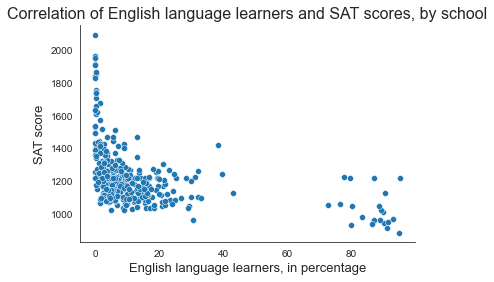

In [25]:
#plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('white')
ax = sns.scatterplot(data=combined, x='ell_percent', y='sat_score')

#plot aesthetics
ax.set_title('Correlation of English language learners and SAT scores, by school', fontsize=16)
ax.set_xlabel('English language learners, in percentage', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

The scatter plot confirms that there´s a correlation between SAT results and the number of non-native English speakers among the students.

In [26]:
districts = combined.groupby('school_dist').agg(np.mean).reset_index()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Share of English-language learners')

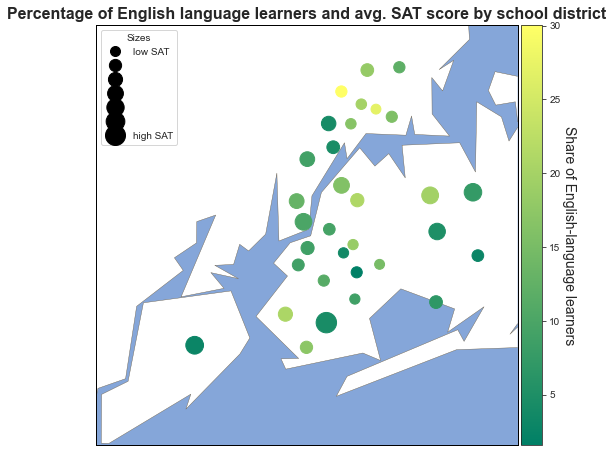

In [27]:
fig, ax = plt.subplots(figsize=(8,8))

#setting the map layout
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

#plot
longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
plot=m.scatter(longitudes, latitudes, zorder=2, latlon=True, 
               s=[8**(n/500) for n in districts['sat_score']], 
               c=districts["ell_percent"], cmap="summer")
ax.set_title('Percentage of English language learners and avg. SAT score by school district', fontsize=16, fontweight='bold')

#legend to describe markers´ sizes
handles, __ = plot.legend_elements('sizes', num=8)
labels = ['low SAT', '', '', '', '', '', 'high SAT']
plt.legend(handles, labels, title='Sizes')

#colorbar aesthetics
##adjust the size of the colorbar to the size of the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(plot, cax=cax)
#adjust the colorbar´s label
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Share of English-language learners', rotation=270, fontsize=14)


As the above map confirms, the schools with highest percentage of non-native English-speakers are concentrated mostly in Bronx and their average SAT results tend to be lower than those of the schools with less ELL students. 

## Insights from Survey Responses: Safety Issues and Academic Expectations

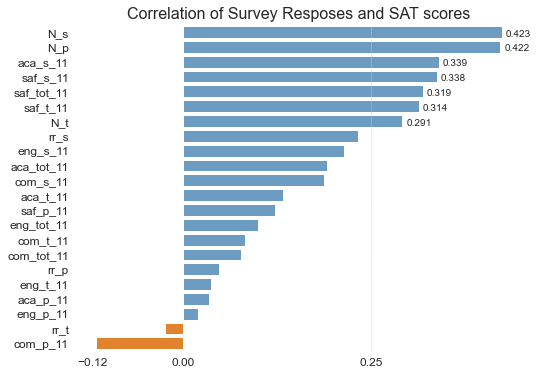

In [28]:
survey_fields_corr = correlations[survey_fields].sort_values(ascending=False)

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
colors=[[95/255, 158/255, 209/255] if (x > 0) else [255/255, 128/255, 14/255] for x in survey_fields_corr]
ax=sns.barplot(x='sat_score', y='index', data=survey_fields_corr.reset_index(), palette=colors)

#plot aesthetics
ax.axvline(x=0.25,color=[207/255, 207/255, 207/255],linestyle='dashed',linewidth=0.5)
ax.set_title('Correlation of Survey Resposes and SAT scores', fontsize=16)
ax.set(ylabel='', xlabel='', xticks=[round(min(survey_fields_corr),2), 0, 0.25])
ax.tick_params(labelsize=12)
sns.despine(left=True, bottom=True)

#plot annotations
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    if (width < -0.25) | (width > 0.25): 
        ax.annotate(str(round(width, 3)),(max(width, 0) + 0.005, y + 0.5), va='center')


The fields with some relevant r value (higher than 0.25) are `N_s`(number of student respondents), `N_p` (number of parent respondents), `aca_s_11` (academic expectation score based on student responses), `saf_s_11` (safety and respect score based on student responses), `saf_tot_11`(safety and respect total score), `saf_t_11` (safety and respect score based on teacher responses), `N_t`(number of teacher respondents). 

Apart the numbers of respondents (which are proxies to `total_enrollment`, thus expectedly correlated with `sat_score`) safety and respect score (both total and set by students and teachers) and academic expectations set by students are correlated with good SAT scores. In other words, when students feel safe and trust in their school academic level, it´s easier for them to focus on achieving good academic results. 

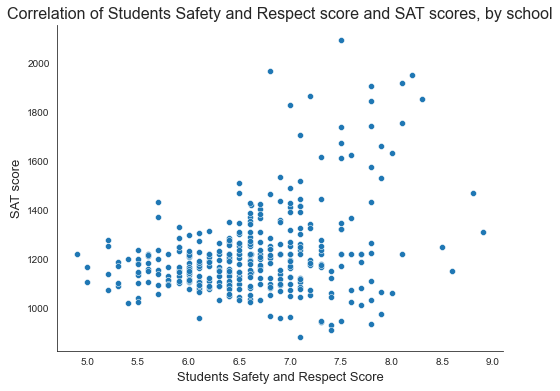

In [29]:
#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
ax=sns.scatterplot(x='saf_s_11', y='sat_score', data=combined)

#plot aesthetics
ax.set_title('Correlation of Students Safety and Respect score and SAT scores, by school', fontsize=16)
ax.set_xlabel('Students Safety and Respect Score', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

The scatter plot confirms the positive correlation between the Safety and Respect Score and the SAT results. But it´s necessary to mention that despite this correlation there are quite a few schools with relatively high Safety and Respect Score but still quite poor SAT results. A fact which might be interpreted as follows: safe and respectful environment is important but it´s not the unique factor of high academic results.  

Anyway checking the data aggregated by districts might give us some useful insights as well. 

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Safety score')

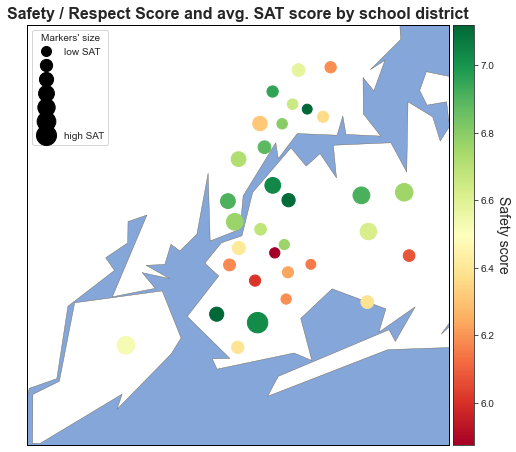

In [30]:

fig, ax = plt.subplots(figsize=(8,8))

#setting the map details
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')
longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()

#plot
plot=m.scatter(longitudes, latitudes, zorder=2, latlon=True, 
               s=[8**(n/500) for n in districts['sat_score']], #adjust the size of markers to the average SAT score
               c=districts["saf_s_11"], cmap="RdYlGn", #adjust the color of the markers to the safety and respect score
               )
ax.set_title('Safety / Respect Score and avg. SAT score by school district', fontsize=16, fontweight='bold')

#legend to describe markers´ sizes
handles, __ = plot.legend_elements('sizes', num=8)
labels = ['low SAT', '', '', '', '', '', 'high SAT']
plt.legend(handles, labels, title="Markers' size")

#colorbar aesthetics
##adjust the size of the colorbar to the size of the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(plot, cax=cax)
##adjust the colorbar´s label
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Safety score', rotation=270, fontsize=14)


 Students from Northen Brooklyn and parts of Bronx and Queens tend to evaluate their environment less safe. Also we can confirm that the safe environment only is not sufficient for doing well on SAT exam: there are many districts whose marker on the plot is green (high Safety score) but of a quite small size (low SAT results).  

## Income (estimated by Free or Reduced Lunch Program) of Families and SAT results 

 Children from low-income families are eligible for free or reduced-price lunch (FRL) at school . The r value for the share of these students and the SAT results is strongly negative.  Let´s check if the scatter plot confirms the negative correlation.

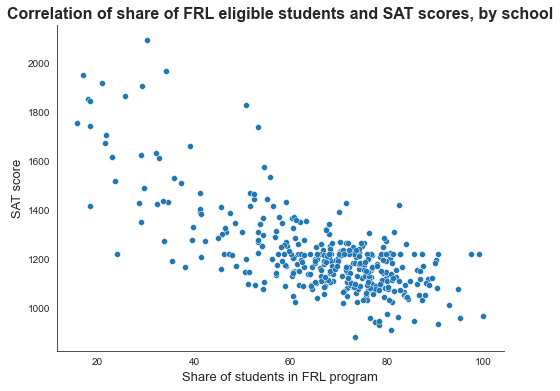

In [31]:
#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
ax=sns.scatterplot(data=combined, x='frl_percent', y='sat_score')

#plot aesthetics
ax.set_title('Correlation of share of FRL eligible students and SAT scores, by school', fontsize=16, fontweight='bold')
ax.set_xlabel('Share of students in FRL program', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

Sadly a strong negative correlation is confirmed. None of the schools with more than 60% of its students eligible for the FRL superates 1400 in its average SAT result. And almost all the schools with less than 40% of the students in FRL programme do better than 1200 in SAT.

One can associate low-income with safety issues. So, let´s check the district distribution and whether the districts with high percentage students from low-income families receive a lower safety score. 

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Share of FRL eligible students')

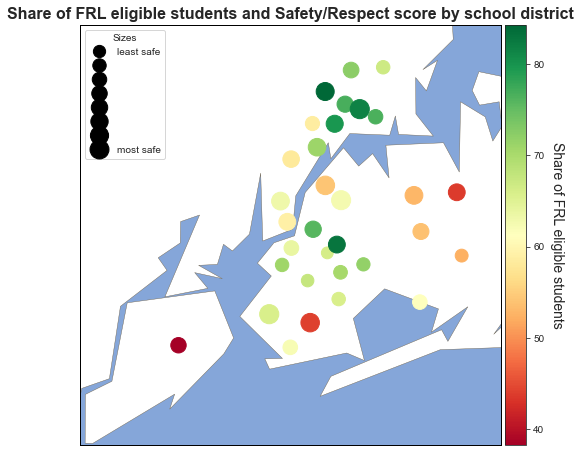

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

#map layout
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')

#plot
plot=m.scatter(longitudes, latitudes, zorder=2, latlon=True, 
               s=[(n ** 5) / 50 for n in districts['saf_s_11']], #set the markers´ size related to the safety and respect score
               c=districts["frl_percent"], cmap="RdYlGn" #set the markers´ color related to the share of FRL students
              )
ax.set_title('Share of FRL eligible students and Safety/Respect score by school district', fontsize=16, fontweight='bold')

#legend to describe markers´ sizes
handles, __ = plot.legend_elements("sizes", num=7)
labels = ['least safe', '', '', '', '', '', '', 'most safe']
plt.legend(handles, labels, title='Sizes')

#colorbar aesthetics
##adjust the size of the colorbar to the size of the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(plot, cax=cax)
##adjust the colorbar´s label
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Share of FRL eligible students', rotation=270, fontsize=14)



The hypothesis above hasn´t found its confirmation. We can see that the districts with high safety score count with either relatively high share of students eligible for FRL or, on the contrary, a low share. Interestingly, the disctircts with lower safety scores are those with only around 60-70% of FRL eligible students. Could be the safety perception related to the neighborhood of students with opposite income level of their families?  

## Racial differences

The U.S. government has put many effort to close the racial achievement gap ultimately. But studies show that disparities still exist between achievement levels of differing ethnic groups. Let´s check till where it´s true for New York City.

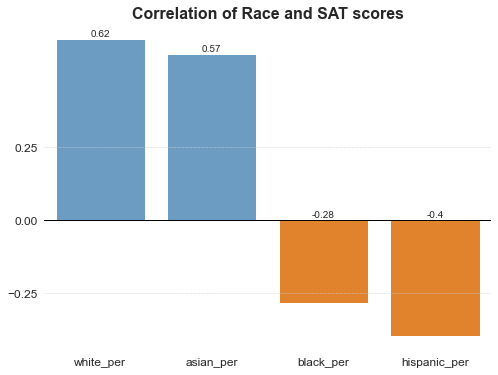

In [33]:
race_fields = ['white_per', 'asian_per', 'black_per', 'hispanic_per']

race_corr = correlations[race_fields].sort_values(ascending=False)

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
colors=[[95/255, 158/255, 209/255] if (y > 0) else [255/255, 128/255, 14/255] for y in race_corr]
ax=sns.barplot(y='sat_score', x='index', data=race_corr.reset_index(), palette=colors)

#plot aesthetics
ax.axhline(y = 0.25, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
ax.axhline(y = -0.25, color = [207/255, 207/255, 207/255], linestyle = 'dashed',linewidth = 0.5)
ax.axhline(y = 0, color = 'black', linestyle = '-',linewidth = 1)
ax.set_title('Correlation of Race and SAT scores', fontsize=16, fontweight='bold')
ax.set(ylabel='', xlabel='', yticks=[-0.25 , 0, 0.25])
ax.tick_params(labelsize=12)
sns.despine(left=True, bottom=True)

#plot annotations
for p in ax.patches:
    height, width = p.get_height(), p.get_width()
    x, y = p.get_xy()
    ax.annotate(str(round(height, 2)), (x + 0.5*width, max(height, 0) + 0.01), ha='center')

There´s a trend in NYC dataset of hispanics and blacks scoring lower than whites a asians. The negative correlation is higher for hispanics than for blacks. And whites seems to do a litle bit better on SAT than asians. Same can be confirmed with scatter plots.

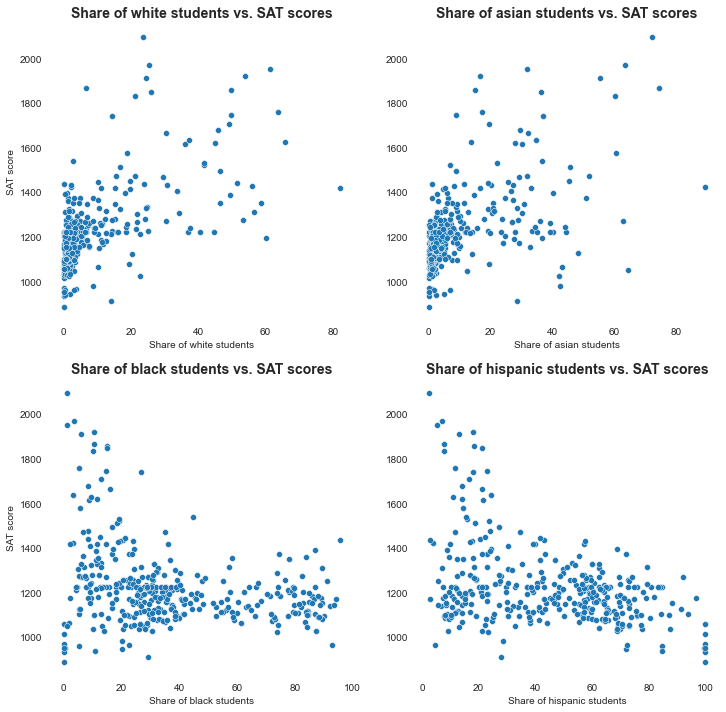

In [34]:
fig = plt.figure(figsize=(12, 12))

for index, race in enumerate(race_fields, 1):
    ax = fig.add_subplot(2, 2, index)
    ax=sns.scatterplot(x=race, y='sat_score', data=combined)

    #plot aesthetics
    race_for_title = race.replace('_per', '')
    ax.set_title('Share of {} students vs. SAT scores'.format(race_for_title), fontsize=14, fontweight='bold')
    ax.set_xlabel('Share of {} students'.format(race_for_title))
    ax.set_ylabel('SAT score' if index == 1 or index == 3 else '')
    sns.despine(left=True, bottom=True) 

The graphs confirm that the schools with high share of hispanic or black students having lower average SAT scores and vice versa for schools with high share of white and asians. But it would be interesting to see not only how the schools with a big share of particular ethnicity are doing but also the results of the schools with more balanced racial composition. We are going to calculate the [Blau´s index(also known as the Gini-Simpson index)](https://en.wikipedia.org/wiki/Diversity_index#Simpson_index)  in order to evaluate the racial diversity of the schools. If the Blau´s index equals its minimum value (i.e., zero), all members of the group are classified in the same category and there is no variety. In contrast, the higher Blau´s index is the more dispersed group members are over the categories. 

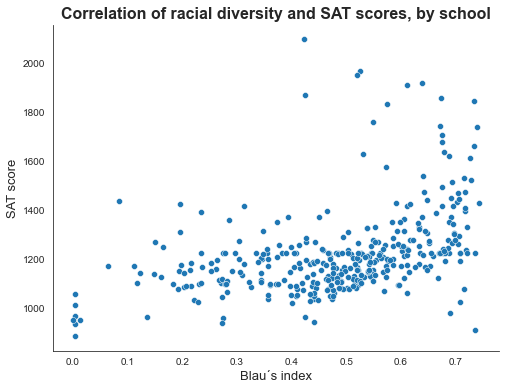

In [35]:
#Calculate the Simpson diversity index
combined['blau_index'] = 1 -(combined[race_fields[0]]**2 + combined[race_fields[1]]**2 + combined[race_fields[2]]**2 + combined[race_fields[3]]**2) / 10000

#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
ax=sns.scatterplot(x='blau_index', y='sat_score', data=combined)

#plot aesthetics
ax.set_title('Correlation of racial diversity and SAT scores, by school', fontsize=16, fontweight='bold')
ax.set_xlabel('Blau´s index', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

There´s a slight positive correlation between the racial diversity and the SAT scores. Some observations which are worth further investigation:
 - there´s a cluster of schools with almost zero diversity and extremely low SAT results;
 - most of the school with the Blau´s index close to 0.7 do better than 1200 in SATs while many schools with the lower Blau´s index do not surpass this level;
 - the number of schools with a balanced racial composition (the Blau´s index close to 0.7) is relatively small;
 - there´re only few schools with their average SAT score higher than 1500 and all of them have their Blau´s over than 0.4.
 
Let´s take a look at the first two school groups.

In [36]:
low_blau=combined[(combined["blau_index"] < .05)]
(low_blau[['SCHOOL NAME','white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']].
                         style.highlight_max(subset=race_fields, color='lightblue', axis=1))

,SCHOOL NAME,white_per,asian_per,black_per,hispanic_per,sat_score
44,MANHATTAN BRIDGES HIGH SCHOOL,0.000000,0.200000,0.000000,99.800000,1058.000000
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND MATHEMATICS,0.000000,0.000000,0.000000,99.800000,1014.000000
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY,0.000000,0.000000,0.600000,99.400000,951.000000
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,0.000000,0.200000,0.000000,99.800000,934.000000
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,0.000000,0.000000,0.000000,99.800000,970.000000
253,MULTICULTURAL HIGH SCHOOL,0.000000,0.000000,0.200000,99.800000,887.000000
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,0.000000,0.000000,0.000000,100.000000,951.000000


All of the homogeneous schools with extremely low SAT score are represented by hispanic students. Let´s take a further investigation to see if they have any factor that correlates negatively with their SAT scores.

In [37]:
low_blau_corr = low_blau.corr()['sat_score']
low_blau_corr[(low_blau_corr < -.25)].sort_values()

lon                                  -0.871
postcode                             -0.762
CSD                                  -0.729
Council District                     -0.687
ell_percent                          -0.610
BBL                                  -0.575
Still Enrolled - % of cohort         -0.559
BIN                                  -0.509
Regents w/o Advanced - % of cohort   -0.498
Regents w/o Advanced - % of grads    -0.425
black_num                            -0.421
female_per                           -0.393
eng_s_11                             -0.348
black_per                            -0.333
Name: sat_score, dtype: float64

The first relative factor with strongest r value is `ell_percent`, a share of English-language learners. It has its logic: the schools are mostly hispanic, English is not a native language for many of their students and it might affect the comprehension of the subject, thus resulting in lower SAT scores.

In [38]:
high_blau = combined[(combined["blau_index"] > .7)]

def highlight_non_greaterthen(s, threshold, cols):
    is_min = s.loc[cols] <= threshold
    if is_min.all() & (s.loc['sat_score'] <= 1200):
        return ['background-color: yellow'] * len(s)
    elif is_min.all() & (s.loc['sat_score'] >= 1500):    
        return ['background-color: lightblue']*len(s)
    else:
        return ['']*len(s)

(high_blau[['SCHOOL NAME','white_per', 'asian_per', 'black_per', 'hispanic_per', 'sat_score']]
                     .style.apply(highlight_non_greaterthen, threshold=35, cols=race_fields, axis=1)
                     )
    

,SCHOOL NAME,white_per,asian_per,black_per,hispanic_per,sat_score
10,PACE HIGH SCHOOL,3.900000,10.100000,32.400000,42.000000,1293.000000
17,NYC ISCHOOL,24.000000,11.500000,20.600000,43.000000,1435.000000
22,PROFESSIONAL PERFORMING ARTS HIGH SCHOOL,41.800000,7.000000,19.100000,23.700000,1522.000000
27,MILLENNIUM HIGH SCHOOL,35.900000,30.000000,8.800000,21.700000,1614.000000
36,MANHATTAN INTERNATIONAL HIGH SCHOOL,14.500000,33.500000,14.800000,36.900000,1227.000000
64,MANHATTAN / HUNTER SCIENCE HIGH SCHOOL,10.200000,25.600000,21.400000,41.500000,1446.000000
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGINEERING AT CITY COLLEGE",26.100000,36.200000,15.000000,21.200000,1847.000000
198,"BROOKLYN LATIN SCHOOL, THE",14.500000,36.800000,26.700000,17.900000,1740.000000
225,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,14.200000,28.400000,29.200000,27.900000,913.000000
264,THE URBAN ASSEMBLY SCHOOL FOR CRIMINAL JUSTICE,9.100000,35.000000,33.700000,21.900000,1223.438806


As we can see even almost the prefect schools in terms of racial distribution can have opposite results in SATs. Which can tell us that despite the existent positive correlation between the racial diversion and SAT scores there are other determinant factors as well. 

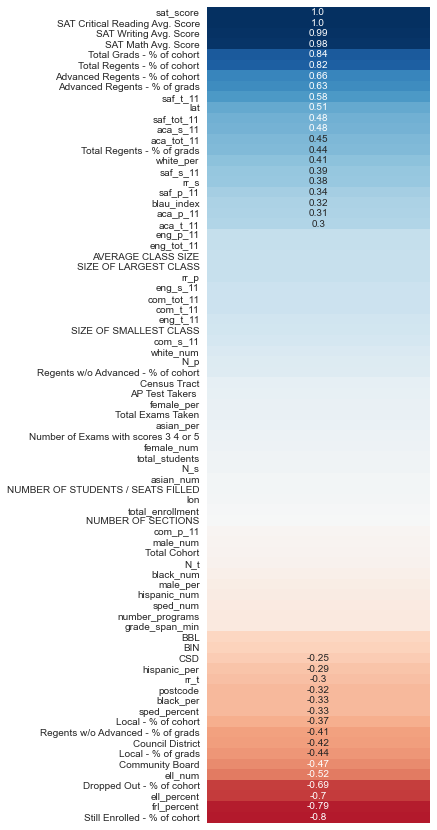

In [39]:
correlation_heatmap(high_blau)

Safety factors and academic expectations one more time seem to have a positive impact on the SAT results. The percentage of English language learners at the school (`ell_percent`)and students eligible for the free-and-reduced-price lunch program (`frl_percent`) has a strong negative correlation with SAT scores same for the NYC schools in general.

## AP Exam vs SAT Scores

Advanced Placement (AP) is a program in the United States and Canada created by the College Board which offers college-level curricula and examinations to high school students.

Before moving with the analysis, we´ll calculate the share of  students that took AP exams thus minimizing the influence of `total_enrollment` which also correlates positively with the SAT results. 

In [40]:
# compute new feature: share of students that took Advanced Placement (AP) exams to earn college credit
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

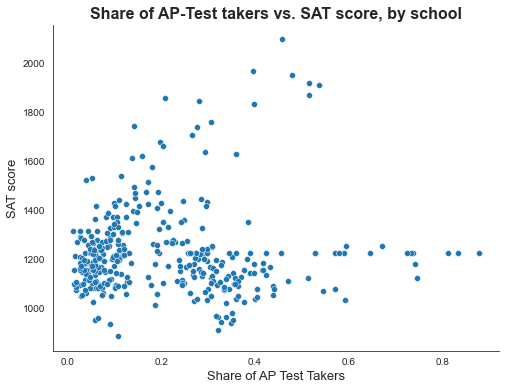

In [41]:
#plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('white')
ax=sns.scatterplot(data=combined, x='ap_per', y='sat_score')

#plot aesthetics
ax.set_title('Share of AP-Test takers vs. SAT score, by school', fontsize=16, fontweight='bold')
ax.set_xlabel('Share of AP Test Takers', fontsize=13)
ax.set_ylabel('SAT score', fontsize=13)
sns.despine()

There're 2 main observations which may be concluded from this graph:
 - for a number of schools we can see a positive correlation between the share of AP-test takers and their SAT results. These schools show highest SAT results than the others. These schools seem to be somewhat selective, so due to better academic aptitudes their students might benefit more from the AP courses than other students
 - another group of schools show average SAT and very high shares of AP-test takers. Since almost all these schools have SAT score that are equal to the average of the dataset, I suspect that their SAT score was missing and imputed. They are there not investigated any further.

Despite the strong correlation confirmed by the scatter plot above for a wide number of schools, we wouldn´t claim it as a decisive factor, considering that a substantial number of data related to the AP program was missing and imputed afterwards.  

In [42]:
missing_vals[['AP Test Takers ', 'Number of Exams with scores 3 4 or 5', 'Total Exams Taken']]

AP Test Takers                          155
Number of Exams with scores 3 4 or 5    223
Total Exams Taken                       155
dtype: int64

## The Differences between Parent, Teacher, and Student Responses to Surveys and its effect on SAT score

For the survey teachers, parents and students were asked to give a score to the four features: safety and respect, academic expectations, level of communication and level of engagement. We are going to investigate if there is any substantial difference between the scores given by teachers, students and parents to different school related fields. 

For this purpose we´ll need to do some data transformation first.

In [43]:
#filter the combined dataframe by survey fields plus SAT scores and School Names
survey_plus = survey_fields.copy()
survey_plus.append('sat_score')
survey_plus.append('SCHOOL NAME')
combined_survey = combined[survey_plus].copy()

#transform the data from wide-type to long-type
combined_survey_melted = pd.melt(combined_survey, id_vars=['SCHOOL NAME'], value_vars = survey_fields)

#keep only safety/respect, academic expectations, communication and engagment scores, dropping the number related fields
combined_survey_melted = combined_survey_melted[combined_survey_melted['variable'].str.contains(r'^[scae]')]

#introducing functions to be used for further transformation
def feature_val(val):
    """labels the scores of the same field but recieved from different type of respondent by unique name associated only to the field
        e.g.: 'saf_s_11' and 'saf_p_11' will be both labeled as 'Safety and Respect Score'
    """
    if val.startswith('saf'):
        return 'Safety and Respect Score'
    elif val.startswith('aca'):
        return 'Academic Expectations Score'
    elif val.startswith('com'):
        return 'Communication Score'
    elif val.startswith('eng'):
        return 'Engagement Score'
    
def respondent_val(val):
    """labels the scores of different field by respondent
        e.g.: 'saf_p_11' and 'aca_p_11' will be labeled as 'Parents'
    """
    if '_p_' in val:
        return 'Parents'
    if '_t_' in val:
        return 'Teachers'
    if '_s_' in val:
        return 'Students'
    if '_tot_' in val:
        return 'Total'

#labeling the scores by respondent and field    
combined_survey_melted['survey_field'] = combined_survey_melted['variable']
combined_survey_melted['survey_field'] = combined_survey_melted['survey_field'].apply(feature_val)
combined_survey_melted['variable'] = combined_survey_melted['variable'].apply(respondent_val)
combined_survey_melted.rename({'variable': 'respondent', 'value': 'score_value'}, axis=1, inplace=True)

#check the result
combined_survey_melted.head()

,SCHOOL NAME,respondent,score_value,survey_field
2178,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Parents,7.800,Safety and Respect Score
2179,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Parents,7.900,Safety and Respect Score
2180,EAST SIDE COMMUNITY SCHOOL,Parents,8.700,Safety and Respect Score
2181,MARTA VALLE HIGH SCHOOL,Parents,7.700,Safety and Respect Score
2182,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",Parents,8.500,Safety and Respect Score


Now we can compare the distribution of scores given by each type of respondent to different fields and also compare it to the average score distribution. 

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


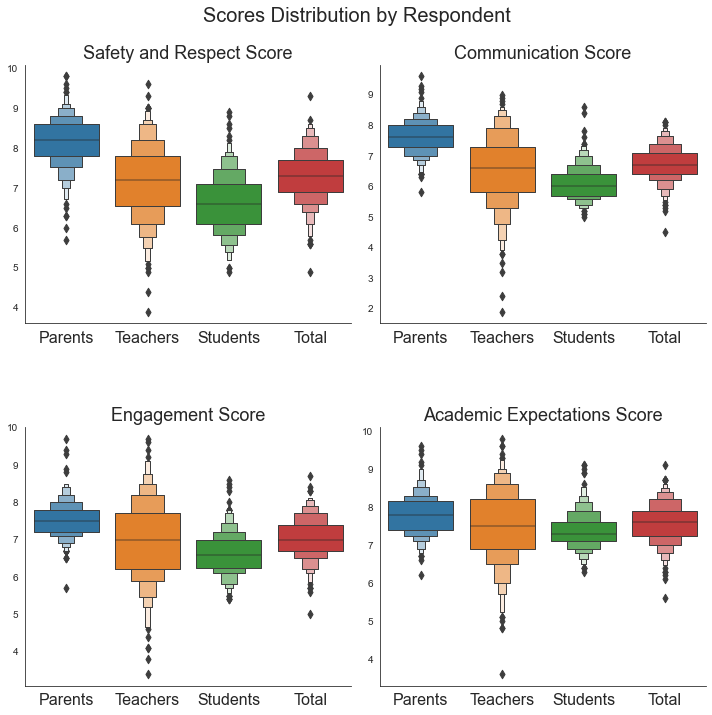

In [62]:
g = sns.catplot(x='respondent', y='score_value', col='survey_field', data=combined_survey_melted, kind='boxen', col_wrap=2, sharex=False, sharey=False)

g.fig.figsize=(13,13)
plt.subplots_adjust(top=.9, hspace=.4)
g.fig.suptitle('Scores Distribution by Respondent', size=20)
(g.set_axis_labels('', '')
  .set_titles('{col_name}', size=18)
  .set_xticklabels(size=16))


All the field present the same pattern: parents tend to give the higher scores than teachers and students and students tend to give the lowest scores. It would be interesting to check if there are schools with a different pattern (i.e. the highest score is given by teachers or students) and how these schools are different from the rest of the schools in terms of its SAT results and other factors, like racial distribution and its location.

In [45]:
#transform the data by transposing only the 'respondent' column
## auxiliary column with cumulative count of rows in each group 
combined_survey_melted['key']=combined_survey_melted.groupby(['survey_field','respondent']).cumcount()
combined_survey_per_respondent = combined_survey_melted.pivot_table(index=['key', 'SCHOOL NAME', 'survey_field'], 
                                                                    columns='respondent', values='score_value',
                                                                    aggfunc=np.sum).reset_index()
combined_survey_per_respondent.head(8)

respondent,key,SCHOOL NAME,survey_field,Parents,Students,Teachers,Total
0,0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Academic Expectations Score,7.600,6.700,6.500,7.000
1,0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Communication Score,7.700,5.600,5.300,6.200
2,0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Engagement Score,7.400,6.100,6.100,6.600
3,0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,Safety and Respect Score,7.800,6.000,6.300,6.700
4,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Academic Expectations Score,7.300,7.000,7.300,7.200
5,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Communication Score,7.400,5.700,5.800,6.300
6,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Engagement Score,7.200,6.300,6.600,6.700
7,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,Safety and Respect Score,7.900,6.000,6.600,6.800


First let´s check if there are some schools where student give the highest score to at least one field. 

In [46]:
high_student_score = combined_survey_per_respondent[(combined_survey_per_respondent['Students'] > combined_survey_per_respondent['Parents'])
                                                   & (combined_survey_per_respondent['Students'] > combined_survey_per_respondent['Teachers'])]

def highlight_most_common(s):
    is_most = s == s.mode().iloc[0]
    return ['background-color: lightblue' if v else '' for v in is_most]
high_student_score.style.apply(highlight_most_common, subset='survey_field', axis=0)

respondent,key,SCHOOL NAME,survey_field,Parents,Students,Teachers,Total
68,17,NYC ISCHOOL,Academic Expectations Score,8.000000,8.100000,7.400000,7.900000
84,21,HIGH SCHOOL FOR ENVIRONMENTAL STUDIES,Academic Expectations Score,7.700000,7.800000,7.400000,7.600000
92,23,BARUCH COLLEGE CAMPUS HIGH SCHOOL,Academic Expectations Score,7.600000,7.800000,7.600000,7.600000
100,25,N.Y.C. MUSEUM SCHOOL,Academic Expectations Score,7.000000,7.400000,5.700000,6.700000
148,37,STUYVESANT HIGH SCHOOL,Academic Expectations Score,7.700000,7.900000,7.200000,7.600000
156,39,UNITY CENTER FOR URBAN TECHNOLOGIES,Academic Expectations Score,7.600000,7.900000,7.400000,7.600000
160,40,TALENT UNLIMITED HIGH SCHOOL,Academic Expectations Score,7.400000,7.500000,6.400000,7.100000
216,54,"HIGH SCHOOL FOR ARTS, IMAGINATION AND INQUIRY",Academic Expectations Score,7.000000,7.100000,6.500000,6.900000
436,109,"ANTONIA PANTOJA PREPARATORY ACADEMY, A COLLEGE BOARD SCHOOL",Academic Expectations Score,6.800000,7.000000,5.100000,6.300000
468,117,EXIMIUS COLLEGE PREPARATORY ACADEMY: A COLLEGE BOARD SCHOOL,Academic Expectations Score,7.200000,7.700000,6.800000,7.300000


There´re only few schools where student responses don´t correspond to the defined pattern showing the highest score. Almost always the difference lies in the academic expectation score.

In [47]:
high_teacher_score = combined_survey_per_respondent[(combined_survey_per_respondent['Teachers']>combined_survey_per_respondent['Parents'])
                                                   & (combined_survey_per_respondent['Teachers']>combined_survey_per_respondent['Students'])]
high_teacher_score.style.apply(highlight_most_common, subset='survey_field', axis=0)


respondent,key,SCHOOL NAME,survey_field,Parents,Students,Teachers,Total
8,2,EAST SIDE COMMUNITY SCHOOL,Academic Expectations Score,8.400000,7.381389,8.800000,8.400000
28,7,FOOD AND FINANCE HIGH SCHOOL,Academic Expectations Score,7.600000,7.200000,7.700000,7.500000
29,7,FOOD AND FINANCE HIGH SCHOOL,Communication Score,7.000000,5.700000,7.100000,6.600000
30,7,FOOD AND FINANCE HIGH SCHOOL,Engagement Score,6.900000,6.100000,7.800000,6.900000
32,8,ESSEX STREET ACADEMY,Academic Expectations Score,8.300000,7.600000,8.900000,8.200000
36,9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,Academic Expectations Score,7.500000,7.400000,8.900000,8.000000
37,9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,Communication Score,7.300000,6.500000,8.100000,7.300000
38,9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,Engagement Score,7.100000,7.000000,8.700000,7.600000
39,9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,Safety and Respect Score,8.000000,7.100000,8.600000,7.900000
50,12,"FACING HISTORY SCHOOL, THE",Engagement Score,7.600000,6.800000,7.700000,7.300000


Something similar happens to the teachers responses outside the pattern, with the only difference that teachers give the higher score than parents and students in quite more numerous occasions than in the previous case. 

We´ll focus then only on the schools which academic expectation score doesn´t fit the common pattern.

In [48]:
#extract the names of the schools of interest
high_student_aca_school_names = high_student_score[high_student_score['survey_field'] == 'Academic Expectations Score']['SCHOOL NAME']
high_teacher_aca_school_names = high_teacher_score[high_teacher_score['survey_field'] == 'Academic Expectations Score']['SCHOOL NAME']

#filter the 'combined' data frame by the schools above
high_student_aca_schools = combined[combined['SCHOOL NAME'].isin(high_student_aca_school_names)]
high_teacher_aca_schools = combined[combined['SCHOOL NAME'].isin(high_teacher_aca_school_names)]

#the data frame with the rest of the schools
rest_schools = combined[~combined['SCHOOL NAME'].isin(high_student_aca_school_names) &
                        ~combined['SCHOOL NAME'].isin(high_teacher_aca_school_names)]

#calculate the racial distribution of 3 groups of schools
num_race = [ 'white_num', 'asian_num', 'black_num', 'hispanic_num']
race_dist = pd.DataFrame(data=[high_student_aca_schools.loc[:, num_race].sum()/high_student_aca_schools.loc[:, num_race].sum().sum(),
                               high_teacher_aca_schools.loc[:, num_race].sum()/high_teacher_aca_schools.loc[:, num_race].sum().sum(),
                               rest_schools.loc[:, num_race].sum()/rest_schools.loc[:, num_race].sum().sum()],
                          index=["High students' ACA", "High teachers' ACA", 'Other schools']) * 100
race_dist.columns = ["White", "Asian","Black","Hispanic"]
race_dist = race_dist.astype(int)

#calculate the borough distribution of 3 groups of schools
borough_dist = combined['borough'].value_counts().reset_index().T
borough_dist = pd.DataFrame(data=[high_student_aca_schools['borough'].value_counts().reset_index().T.loc['borough', :]/high_student_aca_schools['borough'].value_counts().reset_index().T.loc['borough', :].sum(),
                                  high_teacher_aca_schools['borough'].value_counts().reset_index().T.loc['borough', :]/high_teacher_aca_schools['borough'].value_counts().reset_index().T.loc['borough', :].sum(),
                                  rest_schools['borough'].value_counts().reset_index().T.loc['borough', :]/rest_schools['borough'].value_counts().reset_index().T.loc['borough', :].sum(),],
                           index=["High students' ACA", "High teachers' ACA", 'Other schools']) * 100
borough_dist.columns = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island']



In [50]:
race_dist

,White,Asian,Black,Hispanic
High students' ACA,15,37,18,27
High teachers' ACA,18,17,27,36
Other schools,8,12,35,43


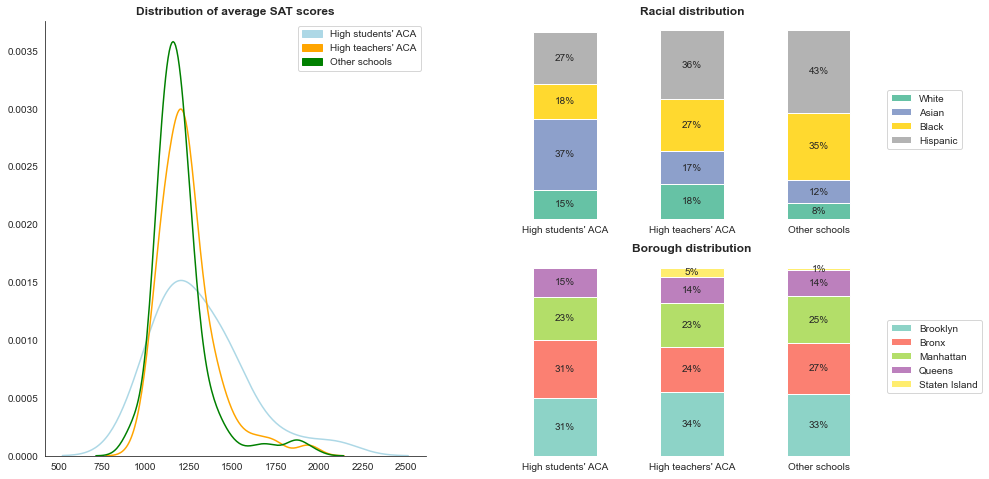

In [49]:
#create a gridsize for 3 plots
gridsize = (2, 2)
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan=2)
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax3 = plt.subplot2grid(gridsize, (1, 1))

#plot KDE distribution of SAT results by each group
sns.kdeplot(ax=ax1, x='sat_score', data=high_student_aca_schools, color='lightblue', label="High students' ACA")
sns.kdeplot(ax=ax1, data=high_teacher_aca_schools, x='sat_score', color='orange', label="High teachers' ACA")
sns.kdeplot(ax=ax1, data=rest_schools, x='sat_score', color='green', label='Other schools')

##create legend for the KDE plot
colors=['lightblue', 'orange', 'green']
labels = ["High students' ACA", "High teachers' ACA", 'Other schools']
label_patches = []
for i in range(0,3):
    label_patch = mpatches.Patch(color=colors[i], label=labels[i])
    label_patches.append(label_patch)
ax1.legend(handles=label_patches, loc='upper right')

##KDE plot aesthetics
ax1.set_title('Distribution of average SAT scores', fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#racial distribution bar plot
race_dist.plot.bar(ax=ax2, stacked=True, cmap='Set2')
ax2.set_title('Racial distribution', fontweight='bold')

#borough distribution bar plot
borough_dist.plot.bar(ax=ax3, stacked=True, cmap='Set3')
ax3.set_title('Borough distribution', fontweight='bold')

#bar plots aesthetics
for ax in [ax2, ax3]:
    ##despine axes
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ##tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels('')
    ##moving the legend out of the plot area
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ##values annotation
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height != 0:
            ax.annotate('{:.0f}%'.format(height), (x + 0.5*width, y + 0.5*height), ha='center', va='center') 

3 main observations based on the comparison:
 - The schools where students have higher academic expectations than their teacher and parents do somewhat better in SAT. 
 - The biggest difference in the racial distribution is that the same schools have got a share of Asian students twice and triple as big as schools where the highest academic expectations come from teachers and the rest of schools respectively. 
 - The borough distribution is quite similar for all 3 groups of schools. 

# Conclusion

 After analyzing the data we reached the following conclusions: 
 1. Student racial composition is correlated with SAT scores: the schools with a bigger share of black and hispanic students tend to have lower SAT results (especially those with a high share of hispanic students, a fact which can be partially explained that hispanic students form a great part of the students whose native language is not English who seem to get lower SAT results)than schools with predominantly white and asian students. Interestingly, the schools with more balanced racial composition tend to show better SAT results.
 2. Students to whom English is not their native language tend to show lower SAT results. It partially explains the poor peformance of schools with high share of hispanic students  
 3. Schools which students find their environment to be safer and more respectful on general show higher SAT results and vice versa. School districts from Northen Brooklyn and parts of Bronx and Queens are indicated to be less safe. 
 4. Schools with high share of students who come from low-income families (indirectly estimated by their eligibility for Free-or-Reduced Price lunch program) are doing worse in SATs. School districts where 50-60% of students are eligible for FRL also are evaluated as less safe based on students' survey. 
 5. High academic expectations set by students have got a positive effect on their SAT performance. It´s curious that schools where students trust more in school academic level than their parents and teachers have got quite wider representation of asian students then the rest of the schools.

In this guided project we have applied the learnings of Step 2 of dataquest's "Data Analyst" learning path. Some of the concepts include:

   - data aggregation using pandas methods like 'pivot_table' and 'groupby'
   - regular expressions
   - vectorized string operations
   - list comprehension and use of apply-function
   - combining dataset with joins and concatenation
   - plotting with matplotlib

Additionally I explored:
   - data transformation from wide-type to long-type and vice versa
   - plotting with seaborn
   - styling dataframes 
   - introduction of some custom functions